# Spline and NDInterpolation Methods

In this notebook we will be looking at two more methods of interpolation, coming from the very well known library 'scipy.'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

In [2]:
def f(x, y):
    return -np.exp(-(y-np.sin(x))**2)

In [3]:
x = np.linspace(-3, 3, 500)
y = np.linspace(-3, 3, 500)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [4]:
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X, Y, zs=Z)
# plt.show()

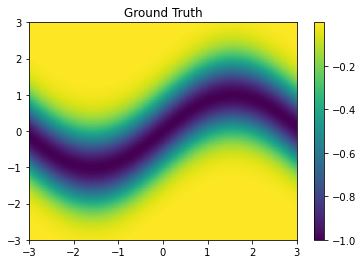

In [5]:
# color mesh map for ground truth
plt.pcolormesh(X, Y, Z, shading='auto')
plt.colorbar()
plt.title('Ground Truth')
plt.show()

In order to interpolate this function, I must artificially decrease the information I have of this surface. To do so, I will sample a grid of 20 points for $x$ and $y$ and use those as an input to the function as I have above, within the range (-3, 3). This should give a random smattering of points in the x,y plane, with accordance to the function $f$ as shown above.

Normally, I would use a randomized technique, but spline interpolation requires an ordered gridmesh of points. This greatly increases the barrier to use a spline technique, but the output is promising nonetheless.

In [6]:
# much of the following code is adapted from scipy.interpolate example code
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

In [7]:
x_edges, y_edges = np.mgrid[-3:3:21j, -3:3:21j]
x = x_edges[:-1, :-1] + np.diff(x_edges[:2, 0])[0]*1.5
y = y_edges[:-1, :-1] + np.diff(y_edges[0, :2])[0] *1.5

In [8]:
z = f(x,y)

In [9]:
xnew_edges, ynew_edges = np.mgrid[-3:3:81j, -3:3:81j]
xnew = xnew_edges[:-1, :-1] + np.diff(xnew_edges[:2, 0])[0] *1.5
ynew = ynew_edges[:-1, :-1] + np.diff(ynew_edges[0, :2])[0] *1.5
tck = interp.bisplrep(x, y, z, s=0)
znew = interp.bisplev(xnew[:,0], ynew[0,:], tck)

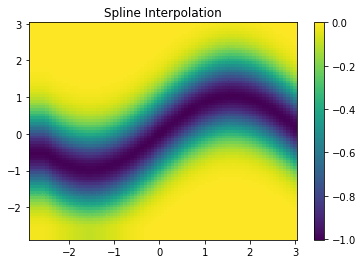

In [10]:
plt.pcolormesh(xnew, ynew, znew, shading='auto')
plt.title('Spline Interpolation')
plt.colorbar()
plt.show()

I'm not sure what's going on with first ~10 columns of pixels, but the rest of the interpolation looks fine.

In [11]:
# TODO: error and stuff

21


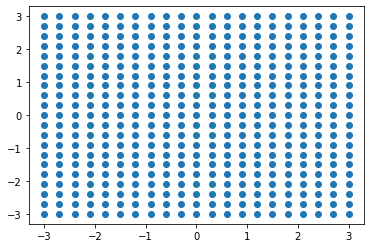

In [12]:
plt.scatter(x_edges, y_edges)
plt.show()

I will now compare the spline interpolation accuracy with a naive linear approach.

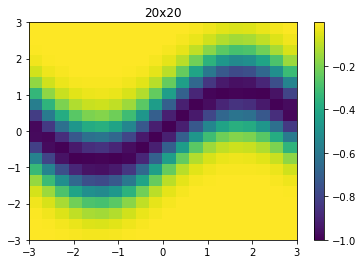

In [13]:

z_test = np.zeros((21, 21))
for i in range(21):
    for j in range(21):
        z_test[i][j] = f(x_edges[i][j], y_edges[i][j])
        

test_arr = np.asarray([[1,2,3],[4,5,6],[7,8,9]])

def instantiate(arr2da, arr2db):
    for i in range(len(arr2da)):
        for j in range(len(arr2da[0])):
            arr2db[i*2][j*2] = arr2da[i][j]
    return arr2db
        
def increase_density(arr2d):
    sizeX = len(arr2d)
    sizeY = len(arr2d[0])
    newX = (sizeX-1)*2 + 1
    newY = (sizeY-1)*2 + 1
    arr2d_dense = np.zeros((newX, newY))
    arr2d_dense = instantiate(arr2d, arr2d_dense)
    
    for i in range(sizeX - 1):
        for j in range(sizeY - 1):
            arr2d_dense[i*2 + 1][j*2] = (arr2d_dense[i*2][j*2] + arr2d_dense[(i+1)*2][j*2])/2
            arr2d_dense[i*2][j*2 + 1] = (arr2d_dense[i*2][j*2] + arr2d_dense[i*2][(j+1)*2])/2
            
#     final row (on bottom) of matrix
    for i in range(sizeX - 1):
        arr2d_dense[i*2 + 1][newY-1] = (arr2d_dense[i*2][newY-1] + arr2d_dense[i*2 + 2][newY-1])/2
#     final column (on far-right side) of matrix
    for j in range(sizeY - 1):
        arr2d_dense[newX-1][j*2 + 1] = (arr2d_dense[newX-1][j*2] + arr2d_dense[newX-1][j*2 + 2])/2

#     centers of localized expansion
    for i in range(sizeX - 1):
        for j in range(sizeY - 1):
            arr2d_dense[i*2 + 1][j*2 + 1] = (arr2d_dense[i*2][j*2] + arr2d_dense[i*2+1][j*2] + arr2d_dense[i*2 + 2][j*2] + arr2d_dense[i*2][j*2 + 1] + arr2d_dense[i*2 + 2][j*2 + 1] + arr2d_dense[i*2][j*2 + 2] + arr2d_dense[i*2 + 1][j*2 + 2] + arr2d_dense[i*2 + 2][j*2 + 2])/8
    
    return arr2d_dense
        
plt.pcolormesh(x_edges, y_edges, z_test)
plt.colorbar()
plt.title('20x20')
plt.show()

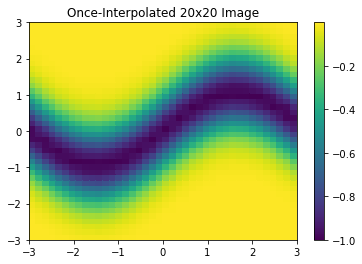

In [14]:
a = increase_density(x_edges)
b = increase_density(y_edges)
c = increase_density(z_test)
        
plt.pcolormesh(a, b, c)
plt.colorbar()
plt.title('Once-Iterated 20x20 Image Interpolation')
plt.show()

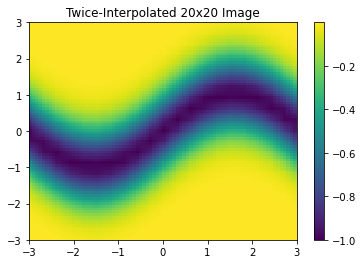

In [15]:
z_naivedense = increase_density(c)

plt.pcolormesh(xnew_edges, ynew_edges, z_naivedense)
plt.colorbar()
plt.title('Twice-Iterated 20x20 Image Interpolation')
plt.show()